In [66]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import random


In [67]:
data_pd = pd.read_csv('/Users/Fabio/Desktop/CMS-SpikingNeuralNetwork/Code/MODE/CSV/NL0=6_NL1=6_NCl=6_CF01=1.00_CFI0=1.00_CFI1=1.00_alfa=0.25_output.csv') #NEW WORKs
# data_pd = pd.read_csv("NL0=20_NL1=20_NCl=6_CF01=1.00_CFI0=1.00_CFI1=1.00_alfa=0.90_output.csv") #OLD WORKS
data_pd.describe()


,Event,ID,Stream,Time,Pclass
count,7077.000000,7077.000000,7077.000000,7.077000e+03,7077.000000
mean,99762.508831,1.393104,9.867175,6.491405e-07,2.343931
std,143.032648,0.488474,5.746126,3.533213e-07,1.664432
min,99501.000000,1.000000,0.000000,1.420270e-08,0.000000
25%,99642.000000,1.000000,4.000000,3.629830e-07,1.000000
50%,99771.000000,1.000000,11.000000,6.672930e-07,2.000000
75%,99886.000000,2.000000,14.000000,9.487850e-07,4.000000
max,99997.000000,2.000000,20.000000,1.244480e-06,5.000000


In [68]:
print(data_pd.keys())

Index(['Event', 'ID', 'Stream', 'Time', 'Pclass'], dtype='object')


Preprocess

Plots

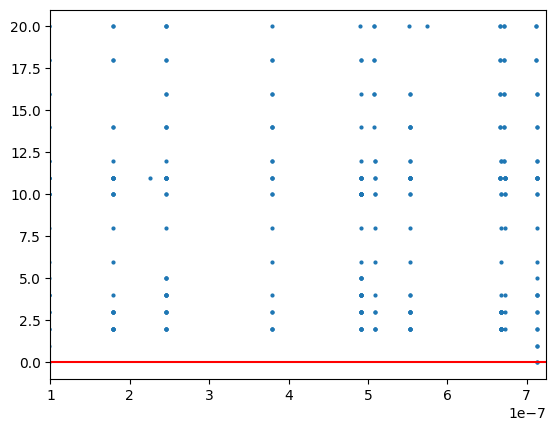

In [69]:
class_mask = data_pd['Pclass'] == 2
plt.scatter(data_pd['Time'][class_mask], data_pd['Stream'][class_mask] , s=4)
plt.xlim(1e-7, 7.25e-7)
plt.axhline(0, c = 'r')

## Looking at one single event

In [70]:
N_EV = data_pd['Event'].unique()[0]

In [71]:
#select an event using data_dict['Event']
mask_ev1 = data_pd['Event'] == N_EV

ev1 = {}
for k in data_pd.keys():
    ev1[k] = data_pd[k][mask_ev1]


In [72]:
t_track = ev1['Time'][ev1['ID'] == 1]
t_track

0     3.515740e-08
1     3.515740e-08
2     3.515740e-08
3     3.515740e-08
4     3.539030e-08
5     3.539030e-08
6     3.539030e-08
7     3.539030e-08
8     3.539030e-08
9     3.539030e-08
10    3.539030e-08
11    3.539030e-08
12    3.539030e-08
13    3.539030e-08
14    3.539030e-08
15    3.539030e-08
16    3.539030e-08
17    3.539030e-08
Name: Time, dtype: float64

In [73]:
t_neur = ev1['Time'][ev1['ID'] == 2]
t_neur

18    3.562310e-08
19    3.562310e-08
20    3.562310e-08
21    3.562310e-08
22    3.562310e-08
23    3.562310e-08
24    3.585590e-08
25    3.585590e-08
26    3.585590e-08
27    3.585590e-08
Name: Time, dtype: float64

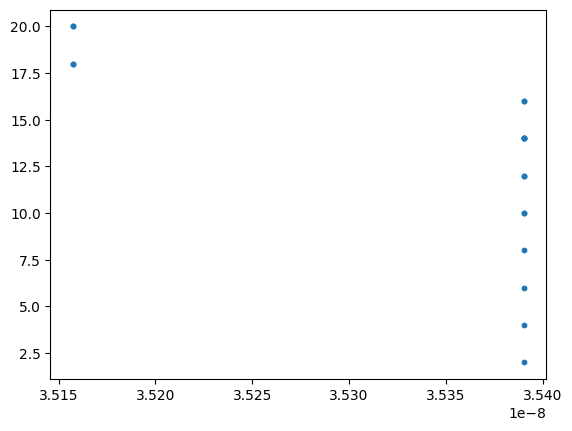

In [74]:
#plot the track of a single particle
plt.scatter(t_track, ev1['Stream'][ev1['ID'] == 1], s=10)

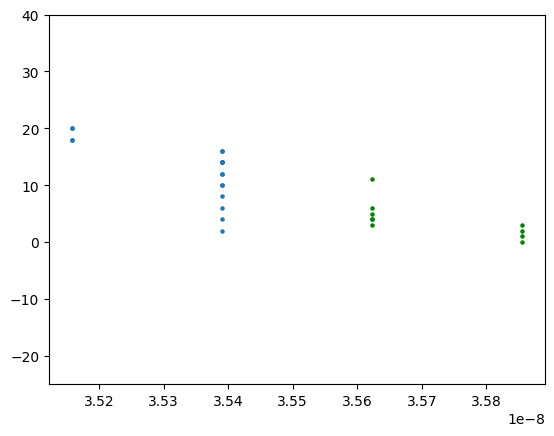

In [75]:
plt.scatter(t_track, ev1['Stream'][ev1['ID'] == 1], s=5)
plt.scatter(t_neur, ev1['Stream'][ev1['ID'] == 2], c='g', s = 5)
plt.ylim(-25,40)
plt.show()
#plot the grid on x and y


In [76]:
hit_neur = ev1['Stream'][ev1['ID'] == 2]
hit_neur

18     3
19     4
20     6
21     4
22     5
23    11
24     2
25     3
26     0
27     1
Name: Stream, dtype: int64

Every spike that arrives induces a change in the membrane potential according to a certain function.\
These changes are smoothed to zero after a time of 7 τ from the arrival of the impulse.\
So, when the neuron receives the last hit of the trace, after a time of 7 τ, the effect of that impulse on the membrane potential is automatically zero.

In [77]:
#Using min_t_track and max_t_track,let's bin in 10 bins the time interval and put the hits of neuron inside the bins
n_bins = 40
bins = np.arange(1, n_bins+1)
print(bins.shape)
print(bins)
hist_y, bin_edges_y = np.histogram(hit_neur[mask_sel_neur], bins=bins)
hist_y



(40,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


NameError: name 'mask_sel_neur' is not defined

In [ ]:
def get_hist_neuron(N_EV, data, N_NEUR):

    """
    This function returns the histogram of the neuron hits inside the track of the particle
    """
    #select an event using data_dict['Event']
    mask_ev1 = data['Event'] == N_EV
    
    ev1 = {}

    for k in data.keys():
        ev1[k] = data[k][mask_ev1]

    t_track = ev1['Time'][ev1['ID'] == 1]

    t_neur = ev1['Time'][ev1['ID'] == 2]
    hit_neur = ev1['Stream'][ev1['ID'] == 2]

    min_t_track = np.min(t_track) - 0.01e-7
    max_t_track = np.max(t_track) + 0.01e-7
    mask_sel_neur = np.logical_and(t_neur>min_t_track, t_neur<max_t_track)

    bins = np.arange(0, N_NEUR+1)

    #now check if inside the t_neuron there are values inside the bins
    hist, bin_edges = np.histogram(hit_neur[mask_sel_neur], bins=bins)

    return hist


In [ ]:
N_NEUR = 12 

hist0 = np.zeros(N_NEUR)
hist1 = np.zeros(N_NEUR)
hist2 = np.zeros(N_NEUR)
hist3 = np.zeros(N_NEUR)
hist4 = np.zeros(N_NEUR)
hist5 = np.zeros(N_NEUR)

H0 = []
H1 = []
H2 = []
H3 = []
H4 = []
H5 = []

for EV in N_EV_class0:
    hist0 = hist0 + get_hist_neuron(EV, data,N_NEUR)
    H0.append(get_hist_neuron(EV, data,N_NEUR))


for EV in N_EV_class1:
    hist1 = hist1 + get_hist_neuron(EV, data,N_NEUR)
    H1.append(get_hist_neuron(EV, data,N_NEUR))



for EV in N_EV_class2:
    hist2 = hist2 + get_hist_neuron(EV, data,N_NEUR)
    H2.append(get_hist_neuron(EV, data,N_NEUR))



for EV in N_EV_class3:
    hist3 = hist3 + get_hist_neuron(EV, data,N_NEUR)
    H3.append(get_hist_neuron(EV, data,N_NEUR))




for EV in N_EV_class4:
    hist4 = hist4 + get_hist_neuron(EV, data,N_NEUR)
    H4.append(get_hist_neuron(EV, data,N_NEUR))



for EV in N_EV_class5:
    hist5 = hist5 + get_hist_neuron(EV, data,N_NEUR)
    H5.append(get_hist_neuron(EV, data,N_NEUR))


HISTS = [hist0, hist1, hist2, hist3, hist4, hist5]
HISTS = np.array(HISTS)

COLORS = ['b', 'g', 'r', 'magenta', 'yellow', 'cyan']

#Now create a matrix plot comparing hist_i and hist_j
plt.subplots(6,6, figsize=(12,9))
for i in range(6):
    for j in range(6):
        plt.subplot(6,6,6*i+j+1)
        plt.bar(np.arange(len(HISTS[i])),HISTS[i], color = COLORS[i], alpha = 0.6)
        plt.bar(np.arange(len(HISTS[j])),HISTS[j], color = COLORS[j], alpha = 0.6)
        plt.xticks([])

        #I want the labels only on the right and on the top
        if j == 0:
            plt.ylabel('Class {}'.format(i))
        if i == 5:
            plt.xlabel('Class {}'.format(j))
        #plot the axes on every histo

            

plt.tight_layout()

NameError: name 'N_EV_class0' is not defined

In [ ]:
H = H0 + H1 + H2 + H3 + H4 + H5

label = []
for i in range(len(H0)):
    label.append(0)
for i in range(len(H1)):
    label.append(1)
for i in range(len(H2)):
    label.append(2)
for i in range(len(H3)):
    label.append(3)
for i in range(len(H4)):
    label.append(4)
for i in range(len(H5)):
    label.append(5)

label = np.array(label)


# Temporal analysis

In [ ]:
#import useful libraries
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# Genera un dataset fittizio di distanze con lunghezza variabile senza zeri
np.random.seed(42)  # Per riproducibilità
num_samples = 50
max_distance_length = 20

# Genera distanze casuali con lunghezza variabile per ciascun passo temporale
distances = [np.random.choice(np.arange(12), size=np.random.randint(1, 13), replace=False) for _ in range(num_samples)]
distances

[array([11,  9,  0,  8,  5,  2,  1]),
 array([ 8, 10,  0,  6, 11,  9,  3,  1]),
 array([11, 10,  6,  4,  3,  1,  7,  2,  0,  8,  5,  9]),
 array([9, 1, 5]),
 array([0, 5, 2, 6]),
 array([ 8,  9,  5,  4,  6, 10,  1]),
 array([ 4,  2,  7,  0,  6, 11, 10,  8,  9,  1]),
 array([11,  2,  5,  0, 10]),
 array([1]),
 array([2]),
 array([ 1, 10,  9,  0, 11,  8,  5]),
 array([10,  1,  3]),
 array([ 1,  8,  5, 10,  9,  7,  4,  3,  0,  6]),
 array([ 7,  9,  0,  8,  4, 10,  1, 11,  5,  2,  6]),
 array([1, 2, 7, 4, 8, 5]),
 array([11,  1, 10,  7,  4,  0,  9,  5,  6]),
 array([ 2,  4,  6,  1,  9,  8,  3,  0, 11,  5, 10,  7]),
 array([9, 5]),
 array([ 8,  7, 11,  3, 10,  1]),
 array([ 9,  8,  1, 10,  4,  5]),
 array([11,  1,  9,  6,  3,  2]),
 array([ 5,  1, 11]),
 array([11,  4,  3,  2,  7,  5,  6,  1]),
 array([11,  6,  2,  7,  4, 10,  5,  9,  1,  0]),
 array([ 4,  1,  6, 11,  7,  0,  5,  3,  9]),
 array([4, 1, 9, 6]),
 array([ 9, 10]),
 array([5, 9, 1, 4]),
 array([8, 3, 4, 0, 1, 6]),
 array([ 7,  

In [10]:
from itertools import combinations

def kendall_distance(seq1, seq2):
    n1, n2 = len(seq1), len(seq2)
    
    # Genera tutte le possibili coppie di indici
    all_pairs_seq1 = list(combinations(range(n1), 2))
    all_pairs_seq2 = list(combinations(range(n2), 2))
    
    # Inizializza il conteggio per coppie concordanti e discordanti
    concordant_count = 0
    discordant_count = 0
    
    # Conta le coppie concordanti e discordanti
    for i, j in all_pairs_seq1:
        for k, l in all_pairs_seq2:
            if (seq1[i] < seq1[j] and seq2[k] < seq2[l]) or (seq1[i] > seq1[j] and seq2[k] > seq2[l]):
                #check if the the firt couple is the same as the second couple
                if (i == l) and (j == k):
                    print(f"Concordant: ({seq1[i]}, {seq1[j]}) and ({seq2[k]}, {seq2[l]})")
                    concordant_count += 1
            elif (seq1[i] < seq1[j] and seq2[k] > seq2[l]) or (seq1[i] > seq1[j] and seq2[k] < seq2[l]):
                print(f"Discordant: ({seq1[i]}, {seq1[j]}) and ({seq2[k]}, {seq2[l]})")
                discordant_count += 1
    
    # Calcola il coefficiente di correlazione di Kendall
    total_pairs = len(all_pairs_seq1) * len(all_pairs_seq2)
    
    # Il coefficiente di correlazione di Kendall è dato da (concordant_count - discordant_count) / total_pairs
    tau = (concordant_count - discordant_count) / total_pairs
    
    return tau

# Esempio di utilizzo
array1 = [1, 2, 3]
array2 = [1, 5, 2]

result_tau = kendall_distance(array1, array2)
print(f"Kendall Distance (tau): {result_tau}")


Discordant: (1, 2) and (5, 2)
Discordant: (1, 3) and (5, 2)
Discordant: (2, 3) and (5, 2)
Kendall Distance (tau): -0.3333333333333333


In [ ]:
#now from using kendaltaw function I want to define an other function that can compute the distance between two list with different length
def kendall_distance(list1, list2):
    """
    This function computes the kendall distance between two lists of different length
    """
    #first of all I need to find the minimum length between the two lists
    min_length = min(len(list1), len(list2))
    #now divide the other list in different lists of length min_length withouth changing the order and compute the kendall distance for each pair
    kendall_list = []
    if len(list1)<=1 or len(list2) <= 1: 
        return -1
    
    if len(list1)>len(list2):
        for i in range(len(list1)-min_length+1):
            kendall_list.append(kendalltau(list1[i:i+min_length], list2)[0])
            print(list1[i:i+min_length], list2)
    else:
        for i in range(len(list2)-min_length+1):
            kendall_list.append(kendalltau(list1, list2[i:i+min_length])[0])
            print(list1, list2[i:i+min_length], kendalltau(list1, list2[i:i+min_length])[0])

            # print(kendalltau(list1[i:i+min_length], list2)[0])
    #now I need to find the minimum value of the kendall distance
    kendall_list = np.array(kendall_list)

    r = np.max(kendall_list)
    #che if r is nan
    if np.isnan(r):
        r = -1
    #now I can compute the kendall distance
    return r


#now let's test the function
print(kendall_distance([0,1], [2,3,3,3]))
# print(kendall_distance([1,2,3,4,5], [6,7]))
# print(kendall_distance([1,2,3,4,5], [9,9]))

# print('kt',kendalltau([1,2], [6,7])[0])




[0, 1] [2, 3] 1.0
[0, 1] [3, 3] nan
[0, 1] [3, 3] nan
-1


# Da migliorare: Se sono tutti diversi spara 1
[7, 11, 4] [8, 9, 2] distance: 1.0

In [ ]:
#print a kendall distance of 0
ord_neur = [list(np.random.choice(np.arange(1, 12), size=np.random.randint(1, max_sequence_length + 1), replace=False)) for _ in range(num_samples)]

print(kendall_distance(ord_neur[1], ord_neur[5]))


NameError: name 'num_samples' is not defined

[11, 10, 1, 9, 6, 3, 2] [11, 10, 1, 9, 7, 4, 2] 1.0
[11, 10, 1, 9, 6, 3, 2] [10, 1, 9, 7, 4, 2, 5] -0.04761904761904762
[11, 10, 1, 9, 6, 3, 2] [10, 11, 7, 5, 4, 2, 8] 0.33333333333333337
[11, 10, 1, 9, 6, 3, 2] [11, 7, 5, 4, 2, 8, 3] 0.33333333333333337
[11, 10, 1, 9, 6, 3, 2] [7, 5, 4, 2, 8, 3, 1] 0.33333333333333337
[11, 10, 1, 9, 6, 3, 2] [5, 4, 2, 8, 3, 1, 9] 0.23809523809523814
[11, 10, 1] [10, 2, 6]
[10, 1, 9] [10, 2, 6]
[1, 9, 6] [10, 2, 6]
[9, 6, 3] [10, 2, 6]
[6, 3, 2] [10, 2, 6]
[11, 10, 1, 9] [1, 6, 3, 7]
[10, 1, 9, 6] [1, 6, 3, 7]
[1, 9, 6, 3] [1, 6, 3, 7]
[9, 6, 3, 2] [1, 6, 3, 7]
[11, 10, 1, 9, 6, 3, 2] [9, 10, 6, 5, 7, 11, 2] 0.23809523809523814
[11, 10, 1, 9, 6, 3, 2] [3, 1, 7, 5, 10, 8, 11] -0.5238095238095238
[11, 10, 1, 9, 6, 3, 2] [1, 7, 5, 10, 8, 11, 9] -0.23809523809523814
[11, 10, 1, 9, 6, 3, 2] [7, 5, 10, 8, 11, 9, 2] -0.23809523809523814
[11, 10, 1, 9, 6, 3, 2] [5, 10, 8, 11, 9, 2, 6] 0.14285714285714288
[11, 10, 1, 9, 6, 3, 2] [3, 1, 6, 4, 11, 2, 10] -0.33333

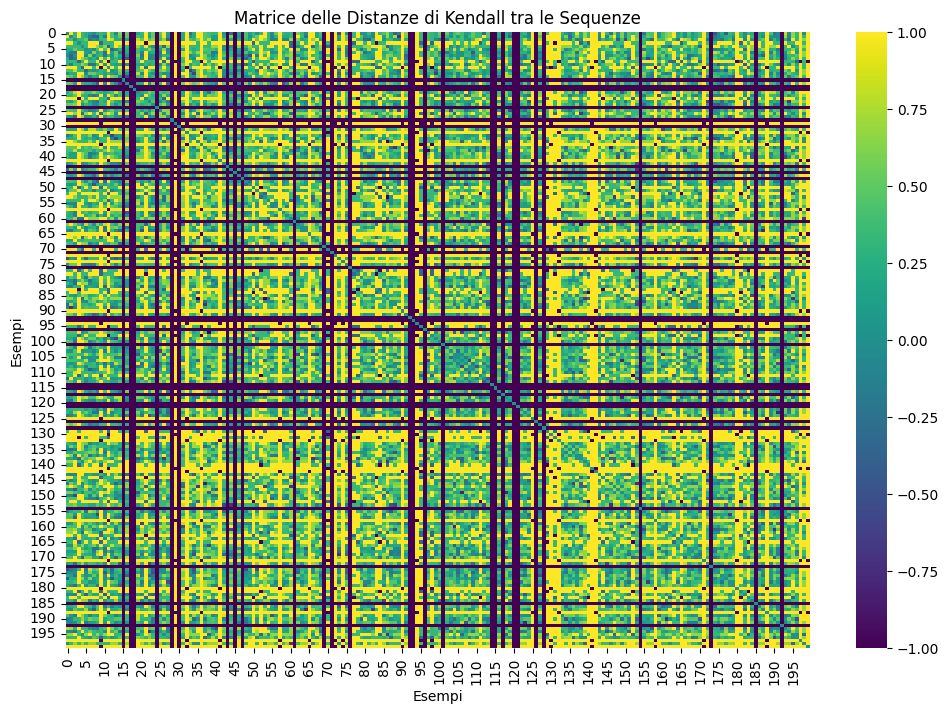

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Genera un set di dati con 50 elementi di lunghezza variabile
np.random.seed(42)
num_samples = 200
max_sequence_length = 10

#generate 5 differet categories of sequence and then mix them and then label them
ord_neur = [list(np.random.choice(np.arange(1, 12), size=np.random.randint(1, max_sequence_length + 1), replace=False)) for _ in range(num_samples)]

# Calcola la matrice delle distanze di Kendall
kendall_distances = np.zeros((num_samples, num_samples))
for i, j in combinations(range(num_samples), 2):
    distance = kendall_distance(ord_neur[i], ord_neur[j])
    kendall_distances[i, j] = distance
    kendall_distances[j, i] = distance  # Poiché la matrice delle distanze è simmetrica

# Visualizza la matrice delle distanze
plt.figure(figsize=(12, 8))
sns.heatmap(kendall_distances, cmap='viridis',  fmt=".0f", xticklabels=5, yticklabels=5)
plt.title('Matrice delle Distanze di Kendall tra le Sequenze')
plt.xlabel('Esempi')
plt.ylabel('Esempi')
plt.show()


In [ ]:
kendall_distances[0,1]

1.0

In [ ]:
#clustering using spectral clustering
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='precomputed', n_init=100)
spectral_clustering.fit(kendall_distances)
spectral_clustering.labels_

#plot the results
plt.figure(figsize=(12, 8))
plt.scatter(np.arange(num_samples), np.zeros(num_samples), c=spectral_clustering.labels_, cmap='viridis')
plt.title('Spectral Clustering')
plt.xlabel('Esempi')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/csgraph/_laplacian.py:546: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))


ValueError: array must not contain infs or NaNs

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns


# Calcola le distanze tra le sequenze
distances = np.array(kendall_distances)

# Esegui il clustering con K-Means
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(distances)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
distances.shape

(200, 200)

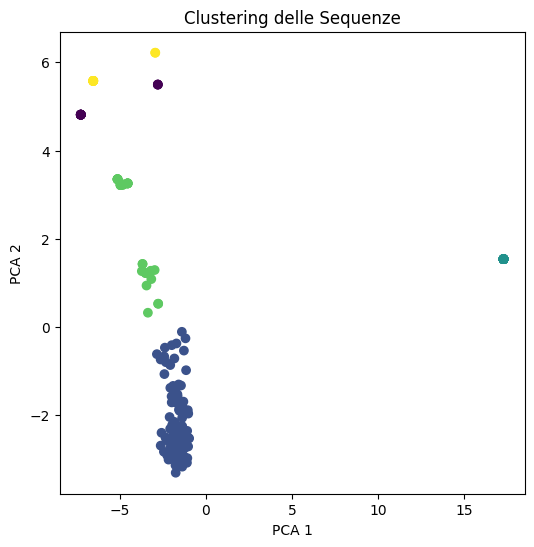

In [ ]:
#plot the clusters on a 2d plas using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(distances)
X_pca = pca.transform(distances)

# Visualizza i cluster
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering delle Sequenze')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [ ]:
print(kmeans.labels_)

#sort the kmeans.labels_ and then print them in a matrix
labels = np.array(kmeans.labels_)
labels = np.sort(labels)
print(labels)

[1 1 1 3 3 1 1 1 1 0 1 4 1 1 1 2 1 2 2 1 1 3 1 1 2 1 3 1 2 4 2 1 0 1 1 3 4
 1 1 1 1 0 1 2 1 2 1 2 1 1 3 1 3 3 3 1 1 0 1 1 3 2 1 1 1 0 3 1 1 2 4 2 0 1
 0 1 2 3 3 1 1 1 1 3 3 1 3 1 1 1 0 1 2 2 4 0 2 1 0 1 1 2 1 1 1 1 1 1 1 1 1
 3 1 1 2 2 1 2 1 1 2 2 1 1 1 4 2 1 2 3 0 3 4 1 1 1 1 1 1 3 3 0 4 1 3 1 1 3
 1 1 1 1 3 1 2 1 1 1 0 1 1 1 3 3 1 3 1 1 1 1 1 0 1 2 1 1 1 1 1 1 4 3 1 3 1
 2 1 1 0 1 1 1 2 1 1 3 1 4 3 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
kendall_distances[np.argsort(kmeans.labels_)][:, np.argsort(kmeans.labels_)][:,10]

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.33333333,  0.33333333,  1.        ,  1.        ,  0.33333333,
        1.        ,  0.33333333,  0.33333333,  1.        ,  1.        ,
        0.33333333,  1.        ,  0.33333333,  1.        ,  1.        ,
        0.33333333,  0.33333333,  1.        ,  1.        ,  1.        ,
        0.33333333,  1.        ,  1.        ,  1.        ,  1.        ,
        0.33333333,  0.33333333,  1.        ,  1.        ,  0.33333333,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.33333333,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  0.33333333,
        0.33333333, -0.33333333,  1.        ,  0.33333333, -0.33333333,
        1.        ,  0.33333333,  1.        ,  0.33333333,  1.  

[14, 129, 157, 188]


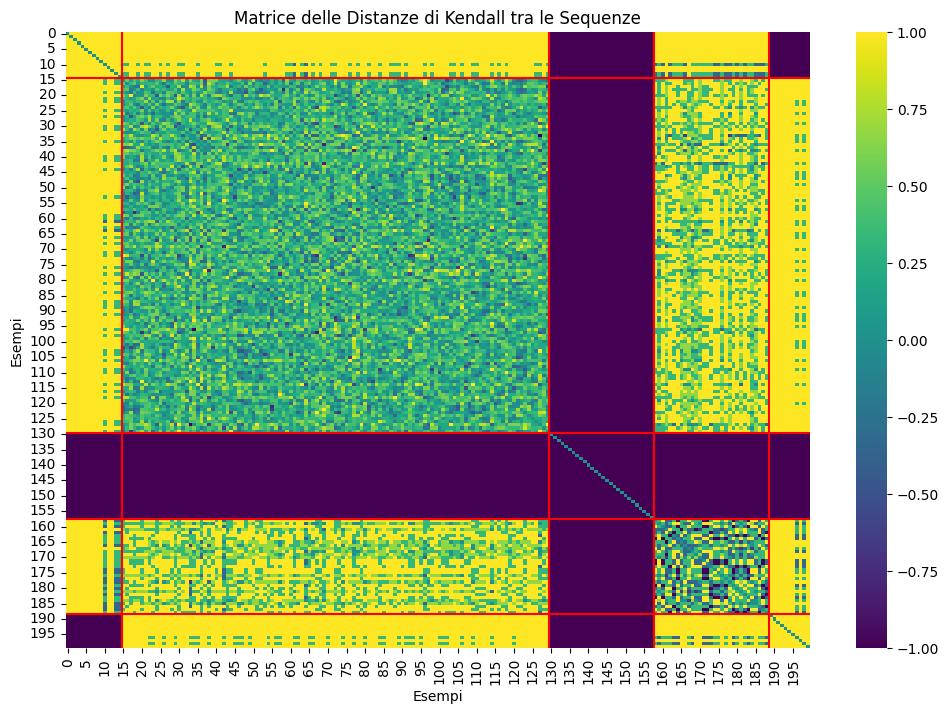

In [ ]:
#using kmeans.labels_ I can order the matrix of kendall_distances
plt.figure(figsize=(12, 8))
sns.heatmap(kendall_distances[np.argsort(kmeans.labels_)][:, np.argsort(kmeans.labels_)], cmap='viridis',  fmt=".0f", xticklabels=5, yticklabels=5)
#change the label and the ticks since the examples are not ordered
plt.title('Matrice delle Distanze di Kendall tra le Sequenze')
plt.xlabel('Esempi')
plt.ylabel('Esempi')


#plot the boundaries of the clusters
boundaries = []
#cont for the different labels
cont = 1
for i in range(len(labels)-1):
    if labels[i] != labels[i+1]:
        boundaries.append(i)
        cont += 1
print(boundaries)

#plot them as vertical lines
for i in range(len(boundaries)):
    plt.axvline(boundaries[i]+1, c = 'r')
    plt.axhline(boundaries[i]+1, c = 'r')

#add axes for explain the clustering to the matrix using one label for each cluster




In [ ]:
for i,ev in enumerate(ord_neur):
    print(ev, "\t\t", kmeans.labels_[i])


[11, 10, 1, 9, 6, 3, 2] 		 1
[11, 10, 1, 9, 7, 4, 2, 5] 		 1
[10, 11, 7, 5, 4, 2, 8, 3, 1, 9] 		 1
[10, 2, 6] 		 3
[1, 6, 3, 7] 		 3
[9, 10, 6, 5, 7, 11, 2] 		 1
[3, 1, 7, 5, 10, 8, 11, 9, 2, 6] 		 1
[3, 1, 6, 4, 11, 2, 10, 5] 		 1
[6, 2, 10, 5, 3, 4, 8, 11, 7] 		 1
[6, 9, 11] 		 0
[8, 10, 11, 4, 3, 5, 6, 9] 		 1
[8, 4, 2] 		 4
[10, 5, 2, 6, 4, 1, 8] 		 1
[9, 1, 5, 2, 10, 6, 8] 		 1
[11, 9, 1, 7, 2, 3, 8, 10, 4] 		 1
[6] 		 2
[6, 8, 11, 7, 10, 9, 4, 2, 3] 		 1
[8] 		 2
[8] 		 2
[8, 2, 5, 1, 11] 		 1
[10, 9, 7, 11, 1, 3, 8, 6] 		 1
[1, 8, 6] 		 3
[6, 10, 5, 9, 4, 3, 11, 2, 7] 		 1
[11, 9, 6, 5, 8, 1, 2] 		 1
[9] 		 2
[5, 11, 2, 7, 9, 3, 4, 10] 		 1
[10, 8, 4, 7] 		 3
[2, 8, 3, 7, 9, 5, 6, 10, 11] 		 1
[11] 		 2
[9, 2] 		 4
[2] 		 2
[6, 2, 11, 9, 10] 		 1
[1, 5] 		 0
[5, 4, 8, 3, 6, 7, 1] 		 1
[6, 11, 9, 8, 4, 5, 1] 		 1
[2, 10, 5, 3] 		 3
[10, 8] 		 4
[8, 2, 5, 11, 10, 3] 		 1
[8, 2, 1, 10, 3] 		 1
[6, 10, 5, 9, 2, 4, 11, 7, 8, 1] 		 1
[8, 3, 6, 10, 2, 1, 11, 4, 9, 7] 		 1
[2, 11] 		 0


The things that can be improved are:
1. Consider the temporal order of firing, which has not been done here.